# Maths for the Helmholtz GP
*cf.* [Berlingheiri et al., 2023](https://arxiv.org/pdf/2302.10364):
$$
\mathbf{u}\sim GP(0, K_{helm})
$$

where

$$
K_{helm} = K_{\psi\psi} + K_{\phi\phi}
$$
i.e. a rotational plus irrotational/divergent component

$$
K_{\psi\psi} = 
\begin{bmatrix}
\frac{\partial^2K_\psi (\mathbf{x}, \mathbf{x'})}{\partial y \partial y'} & 
-\frac{\partial^2K_\psi (\mathbf{x}, \mathbf{x'})}{\partial y \partial x'} \\
-\frac{\partial^2K_\psi (\mathbf{x}, \mathbf{x'})}{\partial x \partial y'} & 
\frac{\partial^2K_\psi (\mathbf{x}, \mathbf{x'})}{\partial x \partial x'}
\end{bmatrix}
$$

$$
K_{\phi\phi} = 
\begin{bmatrix}
\frac{\partial^2K_\phi (\mathbf{x}, \mathbf{x'})}{\partial x \partial x'} & 
\frac{\partial^2K_\phi (\mathbf{x}, \mathbf{x'})}{\partial x \partial y'} \\
\frac{\partial^2K_\phi (\mathbf{x}, \mathbf{x'})}{\partial y \partial x'} & 
\frac{\partial^2K_\phi (\mathbf{x}, \mathbf{x'})}{\partial y \partial y'}
\end{bmatrix}
$$

where
$
K_{\psi} = k_{\psi}(\mathbf{x}, \mathbf{x'}; \theta_{\psi})
$
and
$
K_{\phi} = k_{\phi}(\mathbf{x}, \mathbf{x'}; \theta_{\phi})
$
are plain old parametric GP kernels.

# 1D kernel

In [141]:
from sympy import *
x, x_p, ℓ = symbols('x x_p ℓ')

init_printing(use_unicode=True)

In [142]:
F = exp(-(sqrt((x-x_p)**2)/(ℓ))**2)
F

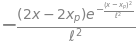

In [143]:
dF_dx = diff(F, x)
dF_dx

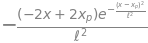

In [144]:
dF_dxp = diff(F, x_p)
dF_dxp

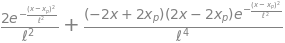

In [145]:
d2F_dxdxp = diff(dF_dx, x_p)
d2F_dxdxp

# 2D kernel

In [146]:
x, y, x_p, y_p, ℓ, ℓ_t, γ = symbols('x y x_p y_p ℓ ℓ_t γ')


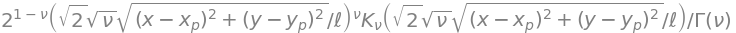

In [359]:
d = sqrt((x-x_p)**2 + (y-y_p)**2)
F = exp(-(1/2)*(d/ℓ)**2) # Square-exp
# F = exp(-(1/2)*d/ℓ) # matern 1/2 i.e. exponential
# F = exp(-(1/2)*(d/ℓ)**γ) # Gamma-exp
# F = exp(-(1/2)*(d/ℓ)**γ) * cos(d/ℓ_t) # Gamma-exp * cosine

# Matern function
x, y, x_p, y_p, ℓ, ν = symbols('x y x_p y_p ℓ ν')
d = sqrt((x-x_p)**2 + (y-y_p)**2)
F = 2**(1-ν)/gamma(ν) * (sqrt(2*ν)*d/ℓ)**ν * functions.special.bessel.besselk(ν, sqrt(2*ν)*d/ℓ)
F


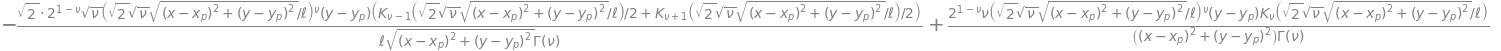

In [360]:
dF_dy = diff(F, y)
simplify(dF_dy)

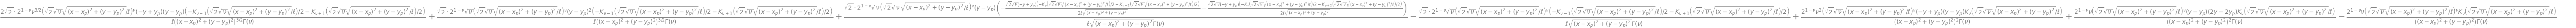

In [361]:
d2F_dydyp = diff(dF_dy, y_p)
d2F_dydyp

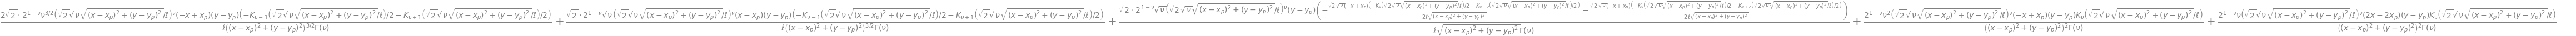

In [362]:
d2F_dydxp = diff(dF_dy, x_p)
d2F_dydxp

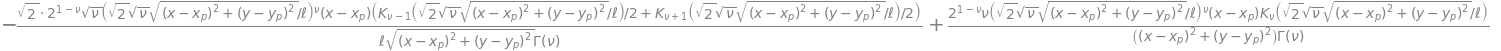

In [363]:
dF_dx = diff(F, x)
simplify(dF_dx)

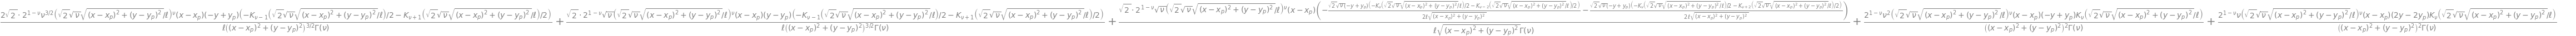

In [364]:
d2F_dxdyp = diff(dF_dx, y_p)
d2F_dxdyp

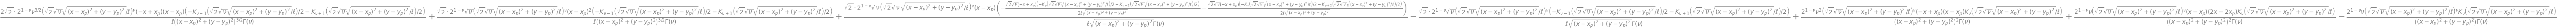

In [365]:
d2F_dxdxp = diff(dF_dx, x_p)
d2F_dxdxp

In [366]:
ccode(d2F_dxdxp)

'/* Not supported in C: */\n/* besselk */\n/* besselk */\n/* besselk */\n/* besselk */\n/* besselk */\n2*M_SQRT2*pow(2, 1 - ν)*pow(ν, 3.0/2.0)*pow(M_SQRT2*sqrt(ν)*sqrt(pow(x - x_p, 2) + pow(y - y_p, 2))/ℓ, ν)*(-x + x_p)*(x - x_p)*(-1.0/2.0*besselk(ν - 1, sqrt(2)*sqrt(ν)*sqrt((x - x_p)**2 + (y - y_p)**2)/ℓ) - 1.0/2.0*besselk(ν + 1, sqrt(2)*sqrt(ν)*sqrt((x - x_p)**2 + (y - y_p)**2)/ℓ))/(ℓ*pow(pow(x - x_p, 2) + pow(y - y_p, 2), 3.0/2.0)*tgamma(ν)) + M_SQRT2*pow(2, 1 - ν)*sqrt(ν)*pow(M_SQRT2*sqrt(ν)*sqrt(pow(x - x_p, 2) + pow(y - y_p, 2))/ℓ, ν)*pow(x - x_p, 2)*(-1.0/2.0*besselk(ν - 1, sqrt(2)*sqrt(ν)*sqrt((x - x_p)**2 + (y - y_p)**2)/ℓ) - 1.0/2.0*besselk(ν + 1, sqrt(2)*sqrt(ν)*sqrt((x - x_p)**2 + (y - y_p)**2)/ℓ))/(ℓ*pow(pow(x - x_p, 2) + pow(y - y_p, 2), 3.0/2.0)*tgamma(ν)) + M_SQRT2*pow(2, 1 - ν)*sqrt(ν)*pow(M_SQRT2*sqrt(ν)*sqrt(pow(x - x_p, 2) + pow(y - y_p, 2))/ℓ, ν)*(x - x_p)*(-1.0/2.0*M_SQRT2*sqrt(ν)*(-x + x_p)*(-1.0/2.0*besselk(ν, sqrt(2)*sqrt(ν)*sqrt((x - x_p)**2 + (y - y_p)**2)/ℓ)

In [367]:
#https://stackoverflow.com/questions/78063283/how-to-use-numpy-as-default-for-code-generation-in-sympy
import sympy.printing.numpy as spn
class NumPyPrinter(spn.NumPyPrinter):
    def __init__(self, settings=None, module='numpy'):
        self._module = module
        m = module + "."
        self._kf = {k: m + v for k, v in spn._known_functions_numpy.items()}
        self._kc = {k: m + v for k, v in spn._known_constants_numpy.items()}
        
        super().__init__(settings=settings)
        
ptr = NumPyPrinter(module='np')
ptr.doprint(d2F_dxdxp)

'  # Not supported in Python with np:\n  # besselk\n  # besselk\n  # besselk\n  # besselk\n  # besselk\n2*np.sqrt(2)*2**(1 - ν)*ν**(3/2)*(np.sqrt(2)*np.sqrt(ν)*np.sqrt((x - x_p)**2 + (y - y_p)**2)/ℓ)**ν*(-x + x_p)*(x - x_p)*(-1/2*besselk(ν - 1, sqrt(2)*sqrt(ν)*sqrt((x - x_p)**2 + (y - y_p)**2)/ℓ) - 1/2*besselk(ν + 1, sqrt(2)*sqrt(ν)*sqrt((x - x_p)**2 + (y - y_p)**2)/ℓ))/(ℓ*((x - x_p)**2 + (y - y_p)**2)**(3/2)*math.gamma(ν)) + np.sqrt(2)*2**(1 - ν)*np.sqrt(ν)*(np.sqrt(2)*np.sqrt(ν)*np.sqrt((x - x_p)**2 + (y - y_p)**2)/ℓ)**ν*(x - x_p)**2*(-1/2*besselk(ν - 1, sqrt(2)*sqrt(ν)*sqrt((x - x_p)**2 + (y - y_p)**2)/ℓ) - 1/2*besselk(ν + 1, sqrt(2)*sqrt(ν)*sqrt((x - x_p)**2 + (y - y_p)**2)/ℓ))/(ℓ*((x - x_p)**2 + (y - y_p)**2)**(3/2)*math.gamma(ν)) + np.sqrt(2)*2**(1 - ν)*np.sqrt(ν)*(np.sqrt(2)*np.sqrt(ν)*np.sqrt((x - x_p)**2 + (y - y_p)**2)/ℓ)**ν*(x - x_p)*(-1/2*np.sqrt(2)*np.sqrt(ν)*(-x + x_p)*(-1/2*besselk(ν, sqrt(2)*sqrt(ν)*sqrt((x - x_p)**2 + (y - y_p)**2)/ℓ) - 1/2*besselk(ν - 2, sqrt(2)*sqrt(

In [370]:
# https://docs.sympy.org/latest/modules/numeric-computation.html
F_np = lambdify([x, y, x_p, y_p, ℓ, ν], F, modules='scipy')
d2F_dxdxp_np = lambdify([x, y, x_p, y_p, ℓ, ν], d2F_dxdxp, modules='scipy')
F_np

<function _lambdifygenerated(x, y, x_p, y_p, l, ν)>

# Bake it into a GPTIDE covariance kernel

In [375]:
def mysqrt(x):
    #idx = x < 1e-10
    #x[idx] = 1e-10
    return np.sqrt(x)
    
class kernel_psi_2d(object):
    """
    $$
    K_{\psi\psi} = 
    \begin{bmatrix}
    \frac{\partial^2K_\psi (\mathbf{x}, \mathbf{x'})}{\partial y \partial y'} & 
    -\frac{\partial^2K_\psi (\mathbf{x}, \mathbf{x'})}{\partial y \partial x'} \\
    -\frac{\partial^2K_\psi (\mathbf{x}, \mathbf{x'})}{\partial x \partial y'} & 
    \frac{\partial^2K_\psi (\mathbf{x}, \mathbf{x'})}{\partial x \partial x'}
    \end{bmatrix}
    $$
    """

    def __init__(self):
        # Sympy starts here...
        x, y, x_p, y_p, ℓ, γ = symbols('x y x_p y_p ℓ γ')
        #x, y, x_p, y_p, ℓ, ν = symbols('x y x_p y_p ℓ ν')

        # Base covariance kernel (as a sympy object)
        # Just comment which kernel for now
        d = sqrt((x-x_p)**2 + (y-y_p)**2)
        #F = exp(-(1/2)*(d/ℓ)**2) # Square-exp
        #F = exp(-(1/2)*d/ℓ) # matern 1/2 i.e. exponential
        #F = exp(-(1/2)*(d/ℓ)**γ) # Gamma-exp

        d = sqrt((x-x_p)**2 + (y-y_p)**2)
        F = 2**(1-ν)/gamma(γ) * (sqrt(2*γ)*d/ℓ)**γ * functions.special.bessel.besselk(γ, sqrt(2*γ)*d/ℓ)
        
        #cff = sqrt(3)*d/ℓ 
        #F = (1+cff)*exp(-cff)#Matern32

        # F = exp(-(1/2)*(d/ℓ)**γ) * cos(d/ℓ_t) # Gamma-exp * cosine
    
        dF_dy = diff(F, y)
        dF_dx = diff(F, x)
        d2F_dydyp = diff(dF_dy, y_p)
        d2F_dxdxp = diff(dF_dx, x_p)
        d2F_dxdyp = diff(dF_dx, y_p)
        d2F_dydxp = diff(dF_dy, x_p)
    
        # ... back to numpy
        #module = [{'sqrt': mysqrt}, 'numpy']
        module = 'jax'
        self.d2F_dydyp_np = lambdify([x, y, x_p, y_p, ℓ, γ], d2F_dydyp, module)
        self.d2F_dxdxp_np = lambdify([x, y, x_p, y_p, ℓ, γ], d2F_dxdxp, module)
        self.d2F_dxdyp_np = lambdify([x, y, x_p, y_p, ℓ, γ], d2F_dxdyp, module)
        self.d2F_dydxp_np = lambdify([x, y, x_p, y_p, ℓ, γ], d2F_dydxp, module)

    def __call__(self, Xin, Xpr, covparams):
        eta, l, gamma = covparams
        e = 1e-10*np.random.normal(size=(X[:,0,None].T.shape))
        # psi
        K1 = np.hstack([self.d2F_dydyp_np(Xin[:,0,None], Xin[:,1,None], Xpr.T[:,0,None].T+e, Xpr.T[:,1,None].T+e, l, gamma),\
            -self.d2F_dydxp_np(Xin[:,0,None], Xin[:,1,None], Xpr.T[:,0,None].T+e, Xpr.T[:,1,None].T+e, l, gamma)])
        K2 = np.hstack([-self.d2F_dxdyp_np(Xin[:,0,None], Xin[:,1,None], Xpr.T[:,0,None].T+e, Xpr.T[:,1,None].T+e, l, gamma),\
            self.d2F_dxdxp_np(Xin[:,0,None], Xin[:,1,None], Xpr.T[:,0,None].T+e, Xpr.T[:,1,None].T+e, l, gamma)])

        # phi
        return eta**2 *np.vstack([K1,K2])
        

class kernel_phi_2d(kernel_psi_2d):
    def __init__(self):
        kernel_psi_2d.__init__(self)

    def __call__(self, Xin, Xpr, covparams):
        eta, l, gamma = covparams
        e = 1e-7*np.random.normal(size=(X[:,0,None].T.shape))
        # psi
        K1 = np.hstack([self.d2F_dxdxp_np(Xin[:,0,None], Xin[:,1,None], Xpr.T[:,0,None].T+e, Xpr.T[:,1,None].T+e, l, gamma),\
            self.d2F_dxdyp_np(Xin[:,0,None], Xin[:,1,None], Xpr.T[:,0,None].T+e, Xpr.T[:,1,None].T+e, l, gamma)])
        K2 = np.hstack([self.d2F_dydxp_np(Xin[:,0,None], Xin[:,1,None], Xpr.T[:,0,None].T+e, Xpr.T[:,1,None].T+e, l, gamma),\
            self.d2F_dydyp_np(Xin[:,0,None], Xin[:,1,None], Xpr.T[:,0,None].T+e, Xpr.T[:,1,None].T+e, l, gamma)])

        # phi
        return eta**2 *np.vstack([K1,K2])

In [376]:
import numpy as np
from gptide import GPtideScipy
import matplotlib.pyplot as plt


# np.random.seed(1)
noise = 0.01
# η = 10.
# ℓ = 900.
# γ = 1.5
covparams = (100., 0.25, 2.5)

dx = 0.1
dy = 0.1

###
# Domain size parameters
N = 25

# Input data points
xd = np.arange(0,dx*N,dx)[:,None]-dx/2
yd = np.arange(0,dy*N,dy)[:,None]-dy/2

# Make a grid
Xg, Yg = np.meshgrid(xd, yd)

# Vectorise grid and stack
Xv = Xg.ravel()
Yv = Yg.ravel()
X = np.hstack([Xv[:,None], Yv[:,None]])

K = kernel_psi_2d()
# K = kernel_phi_2d()

#K(X[:,0,None], X[:,1,None], X[:,0,None].T, X[:,1,None].T, covparams[1], covparams[2]).shape
#jitter = 1e-7*np.random.normal(size=(X.T.shape))
#K(X, X.T, covparams).shape
#K = F_np(X[:,0,None], X[:,1,None], X[:,0,None].T, X[:,1,None].T, covparams[1]).shape
#K = d2F_dxdxp_np(X[:,0,None], X[:,1,None], X[:,0,None].T, X[:,1,None].T, covparams[1])

#jitter = 1e-7*np.random.normal(size=(X.shape))
GP = GPtideScipy(X, X.copy(), noise, K, covparams, P=2)

# # Use the .prior() method to obtain some samples
zd = GP.prior(samples=1)
u = zd[:GP.N//2]
v = zd[GP.N//2::]

ug = u.reshape(Xg.shape)
vg = v.reshape(Xg.shape)

plt.figure()
plt.pcolormesh(Xg, Yg, ug,  cmap='RdBu')
plt.quiver(Xg, Yg, ug, vg,)


TypeError: unsupported operand type(s) for *: 'Mul' and 'ArrayImpl'